In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
 
urls=['https://scontent.feoh2-1.fna.fbcdn.net/v/t1.6435-9/67431262_2932064990351523_8513854323002703872_n.jpg?_nc_cat=101&ccb=1-5&_nc_sid=84a396&_nc_ohc=loJifRi2BfMAX_SkDCS&_nc_ht=scontent.feoh2-1.fna&oh=609bfba65ebf9eebc9d74c15fad44021&oe=614E4747','https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg','https://placekitten.com/800/571']
for url in urls:
  image=io.imread(url)
  image_2=cv.cvtColor(image,cv.COLOR_BGR2RGB)
  final_frame=cv.hconcat((image,image_2))
  cv2_imshow(final_frame)
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image 
print(image.shape[0])
# Check the width of image 
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])


uint8
571
800
3


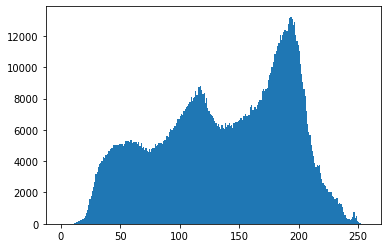

In [ ]:
plt.hist(image.ravel(),bins=256,range=[0,256])
plt.show()

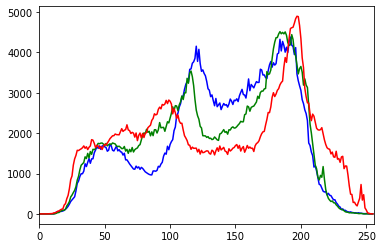

In [ ]:
color=('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


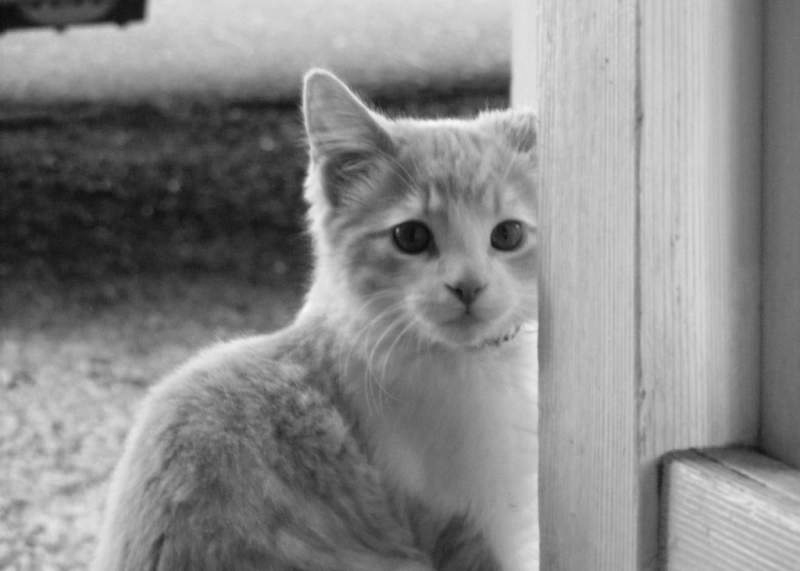

In [ ]:
# Cambiando la imgen 
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)


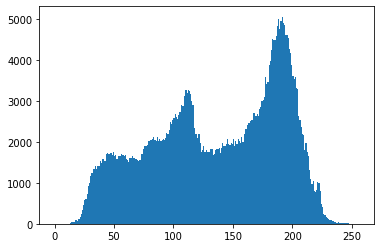

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()


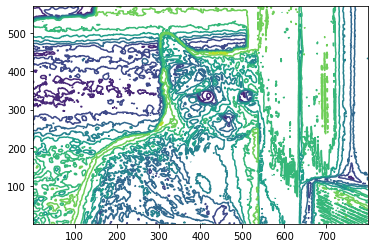

In [ ]:
plt.contour(gray_image, origin = "image")

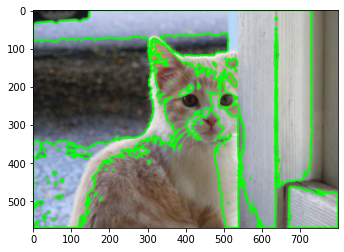

In [ ]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

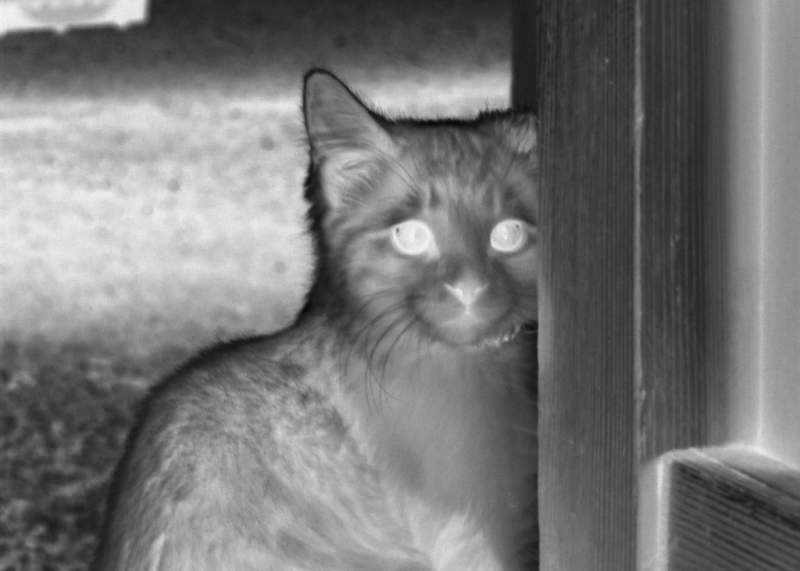

In [ ]:
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

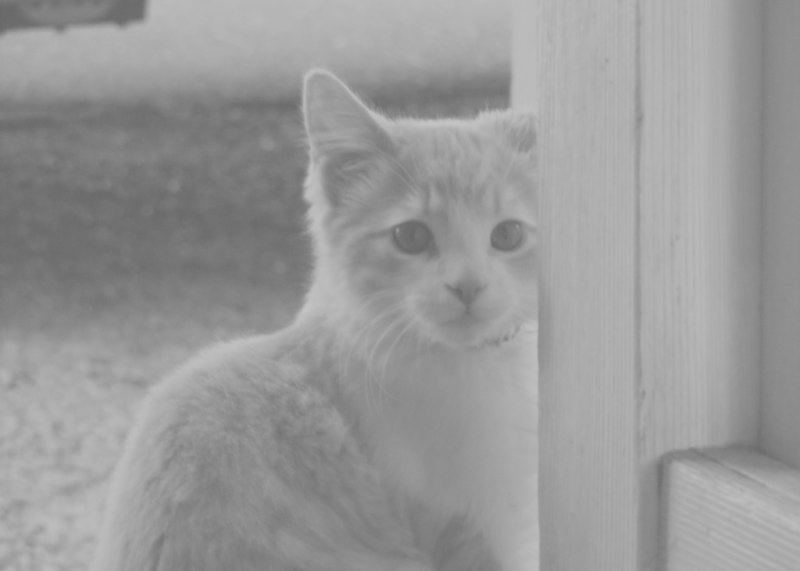

In [ ]:
# Another transform of the image, after adding a constant, 
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

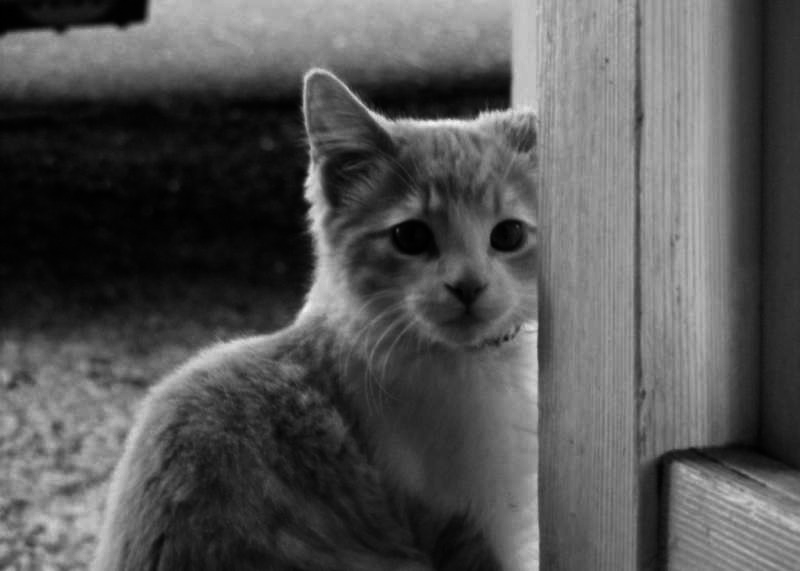

In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)